In [1]:
!pip install tensorloader
!pip install git+https://github.com/inikishev/lightdl

from time import perf_counter

import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

from lightdl import LightDataLoader, TensorDataLoader

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tensorloader: filename=tensorloader-0.1.0-py3-none-any.whl size=7979 sha256=b0d881423e942cab32ff85edc61ade11d68b2c79ad43597ff0fe5a17a28c320d
  Stored in directory: /root/.cache/pip/wheels/71/23/67/f2389da19c6985d0612ad39b63adb667b2dc88a222f9d16c74
Successfully built tensorloader
  Cloning https://github.com/inikishev/lightdl to /tmp/pip-req-build-4mdyg082
  Running command git clone --filter=blob:none --quiet https://github.com/inikishev/lightdl /tmp/pip-req-build-4mdyg082
  Resolved https://github.com/inikishev/lightdl to commit 0af24f97e00dff8cec1e58aee03d24583757f117
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for light-dl: filename=light_dl-1.0.0-py3-none-any.whl size=4882 sha256=a087ff098bc4465030c662c8a43e26e87943a09357954

In [2]:
# download and pre-load CIFAR10 to memory
from torchvision.datasets import CIFAR10
from torchvision.transforms import v2

loader = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32)])
cifar = list(CIFAR10('cifar10', transform = loader, download=True))

time_per_batch_size = {}

100%|██████████| 170M/170M [00:01<00:00, 91.7MB/s]


Extracting cifar10/cifar-10-python.tar.gz to cifar10


In [3]:
images = torch.stack([i[0] for i in cifar])
labels = torch.tensor([i[1] for i in cifar])

# z-normalize
images -= images.mean()
images /= images.std()

images.shape, labels.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000]))

# torch.utils.data.TensorDataset with torch.utils.data.DataLoader

In [4]:
from torch.utils.data import TensorDataset, DataLoader
tensor_dataset = TensorDataset(images, labels)

In [5]:
time_per_batch_size['pytorch DataLoader'] = []

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_dataloader = DataLoader(tensor_dataset, batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in pytorch_dataloader: pass
  time_per_batch_size['pytorch DataLoader'].append(perf_counter() - start)

print(time_per_batch_size['pytorch DataLoader'])

100%|██████████| 128/128 [01:52<00:00,  1.14it/s]

[9.511854871999986, 3.849485415999993, 0.9149258529999997, 0.8376458490000118, 0.744338670000019, 0.7469992529999843, 0.8191160279999963, 0.7488597319999997, 0.7619932469999924, 0.9507831530000033, 1.1694806959999937, 0.9427970939999852, 1.3262120990000028, 1.0835265530000129, 0.9457294110000021, 0.6985133629999893, 0.6868420259999937, 0.7364340399999776, 0.6483659669999895, 0.6612511750000181, 0.6518923579999978, 0.7209102650000148, 1.1910017769999968, 0.696411501, 0.6720918020000113, 0.7098078659999771, 0.6985382420000121, 0.7041411579999988, 0.9385455310000168, 0.9357665439999892, 1.0432392769999979, 0.9120469909999827, 0.6478110280000067, 0.6536219349999897, 0.6618367579999926, 0.6690605930000117, 0.6710783769999864, 0.6700959580000188, 0.6724512180000204, 0.6393529240000078, 0.6689081600000009, 0.6602944099999775, 0.8470344510000132, 0.6364295810000158, 0.6700327080000079, 0.815701746000002, 0.9391767930000015, 0.9907145490000175, 1.0030701519999923, 0.6838348560000043, 0.71561779

In [6]:
time_per_batch_size['pytorch DataLoader with pin_memory'] = []

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_pin_dataloader = DataLoader(tensor_dataset, batch_size = batch_size, shuffle = True, pin_memory = True)

  start = perf_counter()
  for batch in pytorch_pin_dataloader: pass
  time_per_batch_size['pytorch DataLoader with pin_memory'].append(perf_counter() - start)

print(time_per_batch_size['pytorch DataLoader with pin_memory'])

100%|██████████| 128/128 [01:44<00:00,  1.22it/s]

[5.361909641000011, 0.9913649499999906, 0.8077354979999996, 0.7692962510000143, 0.7657228429999918, 0.7498782000000119, 0.6951038619999963, 0.6744661550000046, 0.6922400320000293, 0.6955960119999531, 0.6368876869999553, 0.8917144830000439, 0.938573301999952, 1.0228060489999962, 0.8035115490000067, 0.7896165190000488, 0.7032204569999863, 0.7296590130000027, 0.7179295340000067, 0.790111348000039, 0.7181763070000216, 0.6816730240000197, 0.7918461750000461, 0.7268227639999623, 0.697240163999993, 0.6570560810000075, 0.6767858079999769, 0.9340844730000413, 1.0183890470000279, 1.0062727370000175, 0.9194036300000334, 0.6627268260000392, 0.7115466940000488, 0.7328658729999802, 0.6761350300000117, 0.6552082649999988, 0.6949483749999672, 0.8598120099999846, 0.6377851579999856, 0.6829505580000159, 0.7372903389999692, 0.7426645820000317, 0.776143108000042, 0.8627811850000171, 1.02348742800001, 0.9437283370000387, 1.3915041220000148, 0.7157222320000187, 0.671380202000023, 0.6327967170000193, 0.65162

# TensorLoader

In [7]:
from tensorloader import TensorLoader
time_per_batch_size['TensorLoader'] = []

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorLoader((images, labels), batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorLoader'].append(perf_counter() - start)

print(time_per_batch_size['TensorLoader'])

100%|██████████| 128/128 [01:10<00:00,  1.81it/s]

[1.4126695749999953, 0.6073640310000314, 0.5326320679999981, 0.5140313429999992, 0.5174273809999477, 0.517794030999994, 0.5029322899999897, 0.500106465999977, 0.5056401069999765, 0.5008233699999778, 0.5036404890000199, 0.4896530739999889, 0.5152838310000334, 0.48936942199998157, 0.5237595780000106, 0.4990429529999574, 0.5573616709999669, 0.5851799039999719, 0.570832825000025, 0.5036070040000027, 0.6351114589999725, 0.7474765100000127, 0.7110078480000084, 0.7157937689999585, 0.593457514000022, 0.5097648020000065, 0.5811007649999738, 0.564340054000013, 0.5129511239999829, 0.5140441249999981, 0.5140132559999984, 0.5100720269999783, 0.5133645060000163, 0.5124924950000036, 0.5185980239999708, 0.5332122890000051, 0.5052470670000275, 0.49297496299999466, 0.49944902999999385, 0.4938046909999798, 0.4958489080000277, 0.5001521639999851, 0.5017734980000341, 0.5373856820000356, 0.6965920959999607, 0.6958529060000274, 0.7199625320000109, 0.7221581569999671, 0.5404879120000032, 0.49461011699997925, 

# LightDataLoader

In [8]:
time_per_batch_size['LightDataLoader'] = []

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_pin_dataloader = LightDataLoader(tensor_dataset, batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in pytorch_pin_dataloader: pass
  time_per_batch_size['LightDataLoader'].append(perf_counter() - start)

print(time_per_batch_size['LightDataLoader'])

100%|██████████| 128/128 [01:48<00:00,  1.18it/s]

[1.2276200009999911, 0.6349962249999521, 0.6242099400000143, 0.6492005250000261, 0.647633935999977, 0.5796741719999545, 0.7139578979999897, 0.6264713069999743, 0.5912429150000094, 0.8440489280000065, 0.8576263740000059, 0.9285911989999818, 0.777004814999998, 0.6142774169999825, 0.6377385849999655, 0.6181782240000189, 0.6231487850000121, 0.7661331460000156, 0.7295255259999749, 0.6808334320000426, 0.6586074730000178, 0.685030917000006, 0.6803987239999856, 0.6363524519999828, 0.6535161890000154, 0.614404952999962, 0.6458292339999616, 0.7747141689999921, 0.9464387630000033, 0.9817039810000097, 0.7881828460000406, 0.8301078939999798, 0.643932613000004, 0.6435158610000258, 0.6651248499999838, 0.6609379860000217, 0.8814255490000278, 0.6782019949999949, 0.6859254220000253, 0.6717315309999776, 0.6859508160000019, 0.8803105370000139, 0.664719325999954, 0.6766630650000138, 0.8509279470000024, 0.9467754000000355, 1.0053550119999954, 1.0106276399999956, 0.7169908240000495, 0.6954989999999839, 0.698

# TensorDataLoader

In [9]:
time_per_batch_size['TensorDataLoader'] = []

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorDataLoader((images, labels), batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorDataLoader'].append(perf_counter() - start)

print(time_per_batch_size['TensorDataLoader'])

100%|██████████| 128/128 [01:18<00:00,  1.63it/s]

[0.9109156690000191, 0.4567273939999268, 0.5964756959999704, 0.6459950059999073, 0.5923459599999887, 0.6486880180000298, 0.6132867759999954, 0.4971244210000805, 0.4658021699999608, 0.4642622459999757, 0.46454643300000953, 0.4684599879999496, 0.45885562500006927, 0.4651189499999191, 0.44748350599991227, 0.46166878899998665, 0.45250006300000223, 0.45151884200004133, 0.46313361699992583, 0.4528418860001011, 0.46913039699995807, 0.46312200300008044, 0.5148616579999725, 0.4576234139999542, 0.46610173599992777, 0.4469855400000142, 0.4727344519999406, 0.455993590999924, 0.533213303000025, 0.6228040099999816, 0.6066508429998976, 0.6562790169999744, 0.6326824709999528, 0.5244228200000407, 0.4588647770000307, 0.45981831200003853, 0.4674044820000063, 0.4548112999999603, 0.45941862899996977, 0.45505727199997636, 0.45972744600010174, 0.4618668530000605, 0.4616225959999838, 0.46382532899997386, 0.45595820200003345, 0.46152713799995126, 0.4602138540000169, 0.47061038699996516, 0.502815456999997, 0.48

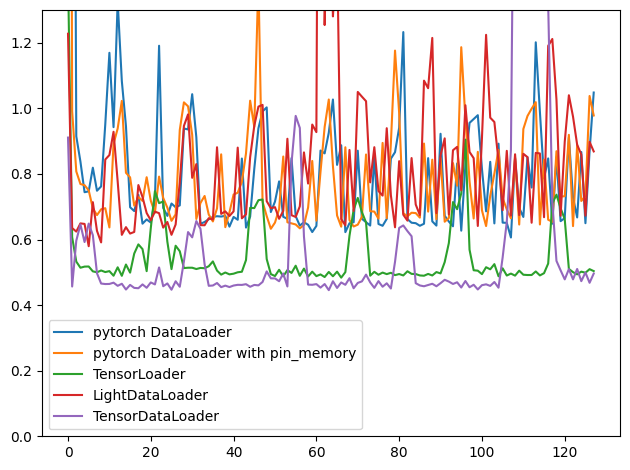

In [10]:
import numpy as np

time_per_batch_size_t = sorted(time_per_batch_size.items(), key = lambda x: np.mean(x[1]))

for key, vals in time_per_batch_size_t:
  plt.plot(vals, label = key)

plt.legend()
plt.ylim(0, 1.3)
plt.tight_layout()
plt.show()